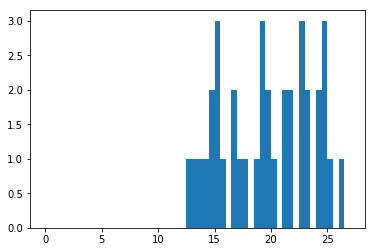

SystemExit: 

In [11]:
import pygame
import sys
from math import *
import random
import numpy as np
import time
import matplotlib.pyplot as plt

pygame.init()
width = 480
height = 660
main_surface = pygame.display.set_mode((width, height))
clock = pygame.time.Clock()
#大分子圓球 橘色
orange = (255,165,0)
#小分子圓球 紅色
red = (255,0,0)
blue = (20, 100, 150)
balls = []
blocks = []
g=0.05
bar_height = 600
# Ball Class
class Ball:
    def __init__(self, x, y, vx, vy, color, hard, radius, mass):
        self.x = x
        self.y = y
        self.color = color
        self.vx = vx
        self.vy = vy
        self.hard = hard
        self.radius = radius
        self.mass = mass

    # Draws Balls on Display Window
    def draw(self, x, y):
        pygame.draw.circle(main_surface, self.color, [int(x), int(y)], self.radius)

    # Moves the Ball around the Screen
    def move(self):
        
        if self.hard == 1:
            self.vx = 0
            self.vy = 0
        self.x = self.x + self.vx
        self.y = self.y + self.vy

        if (self.x + self.radius >= width):
            self.x = width - self.radius
            self.vx = -self.vx
        if (self.radius >= self.x):
            self.x = self.radius
            self.vx = -self.vx
        if (self.y + self.radius >= height):
            self.y = height - self.radius
            self.vy = -self.vy
        if (self.radius >= self.y):
            self.y = self.radius
            self.vy=-self.vy
            
# #             define squares:
#         if (self.radius >=)
    
class Block:
    def __init__(self, x, y, width, height, color):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.color = color

    # Draws Blocks on Display Window
    def draw(self):
        pygame.draw.rect(main_surface, self.color, (self.x, self.y, self.width, self.height))

            

def collision(ball1, ball2):
    r12 = [ball2.x-ball1.x, ball2.y-ball1.y]
    v1 = [ball1.vx, ball1.vy]
    v2 = [ball2.vx, ball2.vy]
    dist = ((ball1.x - ball2.x)**2 + (ball1.y - ball2.y)**2)**0.5
    if dist <= ball1.radius + ball2.radius:
        if np.dot(v1, r12)<0 or np.dot(v2, r12)<0:
            return False
        else:
            return True
    else:
        return False

#  Check Ball-block collisions 
def BlockCollision():
    for bl in balls:
        for bk in blocks:
            if bl.x > bk.x and bl.x < bk.x + bk.width:
                if bl.y + bl.radius > bk.y and bl.y + bl.radius < bk.y + bk.height/2: 
                    bl.y =  bk.y - bl.radius
                    bl.vy = -bl.vy*0.9
                if bl.y - bl.radius < bk.y + bk.height and bl.y - bl.radius > bk.y + bk.height/2:
                    bl.y =  bk.y + bk.height + bl.radius
                    bl.vy = -bl.vy*0.9  
            if bl.y > bk.y and bl.y < bk.y + bk.height:
                if bl.x + bl.radius > bk.x and bl.x + bl.radius < bk.x + bk.width/2: 
                    bl.x =  bk.x - bl.radius
                    bl.vx = -bl.vx*0.9
                if bl.x - bl.radius < bk.x + bk.width and bl.x - bl.radius > bk.x + bk.width/2:
                    bl.x =  bk.x + bk.width + bl.radius
                    bl.vx = -bl.vx*0.9
        
    

# Checks Collision Between Balls
def checkCollision():
    for i in range(len(balls)):
        for j in range(len(balls) - 1, i, -1):
            if collision(balls[i], balls[j]):
                vx1 = balls[i].vx
                vx2 = balls[j].vx
                vy1 = balls[i].vy
                vy2 = balls[j].vy
                v1 = (balls[i].vx**2+balls[i].vy**2)**0.5
                v2 = (balls[j].vx**2+balls[j].vy**2)**0.5
                if v1==0:
                    ang1=acos(vx1/0.001)
                    
                else:
                    ang1=acos(vx1/v1)
                if v2==0:
                    ang2=acos(vx2/0.001)
                else:
                    ang2=acos(vx2/v2)
                    
                m1 = balls[i].mass
                m2 = balls[j].mass
                
                if balls[i].x == balls[j].x:
                    phi = pi/2
                else:
                    phi = atan((balls[j].y-balls[i].y)/(balls[j].x-balls[i].x))
                vfx1=(v1*cos(ang1-phi)*(m1-m2)+2*m2*v2*cos(ang2-phi))*cos(phi)/(m1+m2)+v1*sin(ang1-phi)*sin(phi)
                vfy1=(v1*cos(ang1-phi)*(m1-m2)+2*m2*v2*cos(ang2-phi))*sin(phi)/(m1+m2)+v1*sin(ang1-phi)*cos(phi)
                vfx2=(v2*cos(ang2-phi)*(m2-m1)+2*m1*v1*cos(ang1-phi))*cos(phi)/(m1+m2)+v2*sin(ang2-phi)*sin(phi)
                vfy2=(v2*cos(ang2-phi)*(m2-m1)+2*m1*v1*cos(ang1-phi))*sin(phi)/(m1+m2)+v2*sin(ang2-phi)*cos(phi)
                
                balls[i].vx=vfx1
                balls[i].vy=vfy1
                balls[j].vx=vfx2
                balls[j].vy=vfy2
                



#                 balls[j].vx=((m1*vx1+m2*vx2)-m1*vfx1)/m2
#                 balls[j].vy=((m1*vy1+m2*vy2)-m1*vfy1)/m2

               
                    
def reset():
    global beginning_time
    global times
    beginning_time = time.time()
    times = []
    global balls, blocks
    # (x, y, vx, vy, color, hard, radius, mass)
#     running balls
    for i in range(30):
        for j in range(10):
            b = Ball(10 + i*16, 31+j*16, 1*np.random.normal(0,1), 1*np.random.normal(0,1), orange, 0, 1, 2)
            balls.append(b)
        
    
#     blocks:(x, y, width, height, color):           
    for i in range(12):
        
        for j in range(4):
            b = Block(10+40*i, 200+80*j, 20, 20, blue)
            blocks.append(b)
            
    for i in range(13):
        for j in range(3):
            b = Block(-10+40*i, 240+80*j, 20, 20, blue)
            blocks.append(b)
            
#     for i in range(7):
#         for j in range(3):
#             b = Block(60+60*i-20, 250+100*j, 40, 40, blue)
#             blocks.append(b)
            

#     static balls
#     for i in range(8):
#         for j in range(4):
#             b = Ball(30+60*i, 200+90*j, 0, 0, blue, 1, 20, 100)
#             balls.append(b)
            
#     for i in range(7):
#         for j in range(3):
#             b = Ball(60+60*i, 245+90*j, 0, 0, blue, 1, 20, 100)
#             balls.append(b)
            

def close():
    pygame.quit()
    plot_time_dist(times)
    sys.exit()

    
def main():
    reset()
    while True:
        event = pygame.event.poll()
        if event.type == pygame.QUIT:
            close()
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_q:
                close()

            if event.key == pygame.K_r:
                main()


        
        main_surface.fill((0,0,0))

        checkCollision()
        BlockCollision()
        for b in balls:
            if b.y>bar_height:
                balls.remove(b)
                times.append(time.time() - beginning_time)
            
        for b in balls:
            b.vy=b.vy+g
            b.draw(b.x, b.y)
            b.move()
            
            
        for b in blocks:
            b.draw()

        
        
        pygame.display.update()
        clock.tick(60)
def plot_time_dist(times):
#     print(times)
    times_bins = [_ / 2 for _ in range((floor(times[-1]) + 1) * 2 + 1)]
    plt.hist(times, bins=times_bins)
    plt.show()
        
main()